In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('student-mat.csv', delimiter=";")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [14]:
sns.pairplot(df, hue='sex')

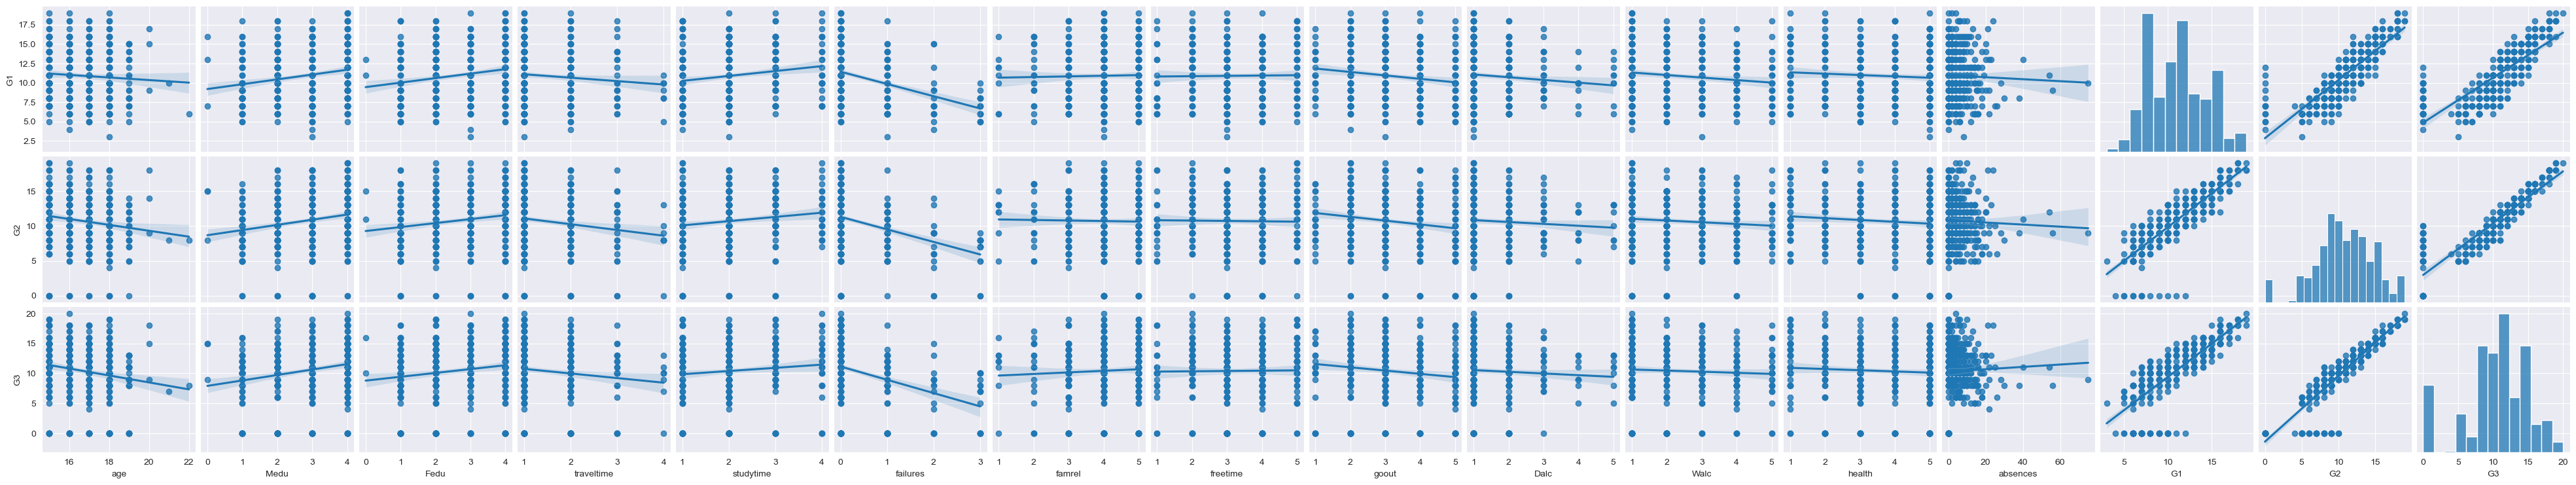

In [4]:
sns.pairplot(df, y_vars=['G1', 'G2', 'G3'], kind='reg')

In [322]:
data1 = df[["failures", "traveltime", "age", "Medu", "Fedu", "G1", "G3"]]
data2 = df[["failures", "traveltime", "age", "Medu", "Fedu", "G1", "G2", "G3"]]
predict = "G3"

X1 = data1.drop([predict], axis=1)
y1 = data1[predict]

X2 = data2.drop([predict], axis=1)
y2 = data2[predict]

In [323]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [324]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=123)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=123)

In [331]:
linear1 = linear_model.LinearRegression()

linear1.fit(X1_train, y1_train)
accuracy1 = linear1.score(X1_test, y1_test)
print('Accuracy after First Period Grades: \n', accuracy1)

linear2 = linear_model.LinearRegression()

linear2.fit(X2_train, y2_train)
accuracy2 = linear2.score(X2_test, y2_test)
print('Accuracy after Second Period Grades: \n', accuracy2)

Accuracy after First Period Grades: 
 0.700969472213113
Accuracy after Second Period Grades: 
 0.830949331574989
